In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [4]:
# Load the sales data
data = pd.read_excel('data_ML.xlsx', parse_dates=['Order_date'])

In [5]:
# Feature engineering
data['day'] = data['Order_date'].dt.day
data['month'] = data['Order_date'].dt.month
data['year'] = data['Order_date'].dt.year
data['day_of_week'] = data['Order_date'].dt.dayofweek

In [6]:
# Create lag features
data['lag1'] = data['Sales'].shift(1)
data['lag7'] = data['Sales'].shift(7)
data['lag30'] = data['Sales'].shift(30)

In [7]:
# Drop rows with NaN values due to lag features
data = data.dropna()

In [16]:
# Reset index before splitting (optional)
data = data.reset_index(drop=True)

Mean Absolute Error: 58.44692953155891


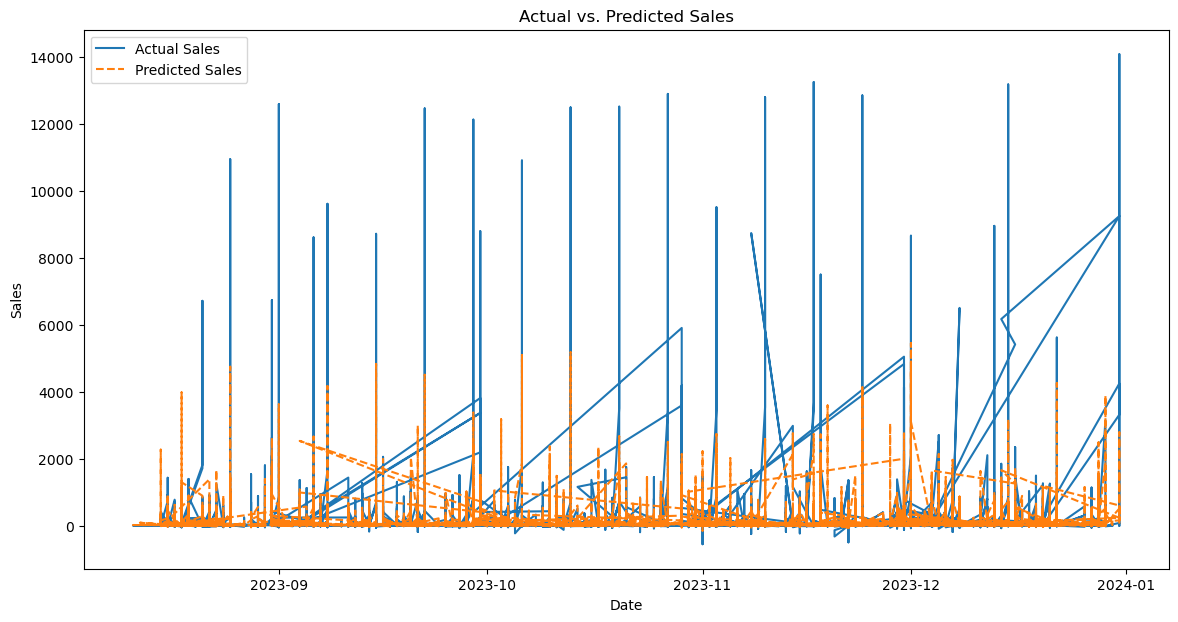

In [17]:

# Split the data into training and testing sets
X = data[['day', 'month', 'year', 'day_of_week', 'lag1', 'lag7', 'lag30']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the Random Forest Regressor with reduced number of trees and parallel processing
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Create a DataFrame for visualization
results = pd.DataFrame({
    'Order_date': data['Order_date'].iloc[X_test.index],
    'actual_sales': y_test.values,
    'predicted_sales': y_pred
})

# Plot actual vs. predicted sales
plt.figure(figsize=(14, 7))
plt.plot(results['Order_date'], results['actual_sales'], label='Actual Sales')
plt.plot(results['Order_date'], results['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


Mean Absolute Error: 52470.28186666659
Root Mean Squared Error: 62752.30521878503
R^2 Score: -0.7075650626574153


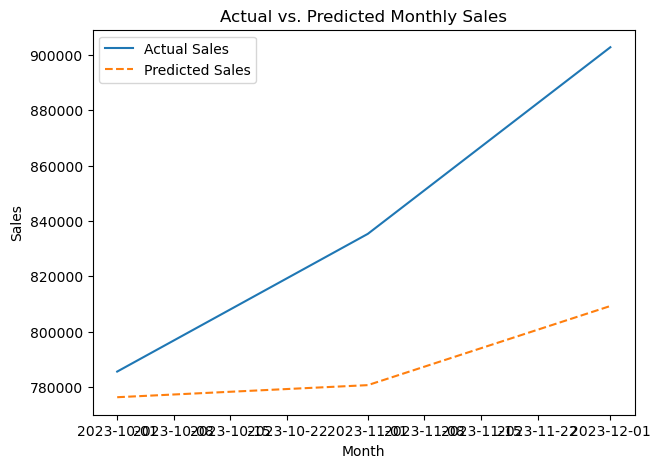

In [20]:

# Aggregate daily sales to monthly sales
data['month'] = data['Order_date'].dt.to_period('M')
monthly_data = data.groupby('month').agg({'Sales': 'sum'}).reset_index()

# Feature engineering
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()
monthly_data['year'] = monthly_data['month'].dt.year
monthly_data['month_num'] = monthly_data['month'].dt.month

# Create lag features for monthly data
monthly_data['lag1'] = monthly_data['Sales'].shift(1)
monthly_data['lag3'] = monthly_data['Sales'].shift(3)
monthly_data['lag6'] = monthly_data['Sales'].shift(6)
monthly_data['lag12'] = monthly_data['Sales'].shift(12)

# Drop rows with NaN values due to lag features
monthly_data = monthly_data.dropna().reset_index(drop=True)

# Split the data into training and testing sets
X = monthly_data[['year', 'month_num', 'lag1', 'lag3', 'lag6', 'lag12']]
y = monthly_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the Random Forest Regressor with reduced number of trees and parallel processing
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Create a DataFrame for visualization
results = pd.DataFrame({
    'month': monthly_data.loc[X_test.index, 'month'],
    'actual_sales': y_test.values,
    'predicted_sales': y_pred
})

# Plot actual vs. predicted monthly sales
plt.figure(figsize=(7, 5))
plt.plot(results['month'], results['actual_sales'], label='Actual Sales')
plt.plot(results['month'], results['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Monthly Sales')
plt.legend()
plt.show()

Mean Absolute Error: 52470.28186666671
Root Mean Squared Error: 62752.305218785186
R^2 Score: -0.7075650626574237


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: U

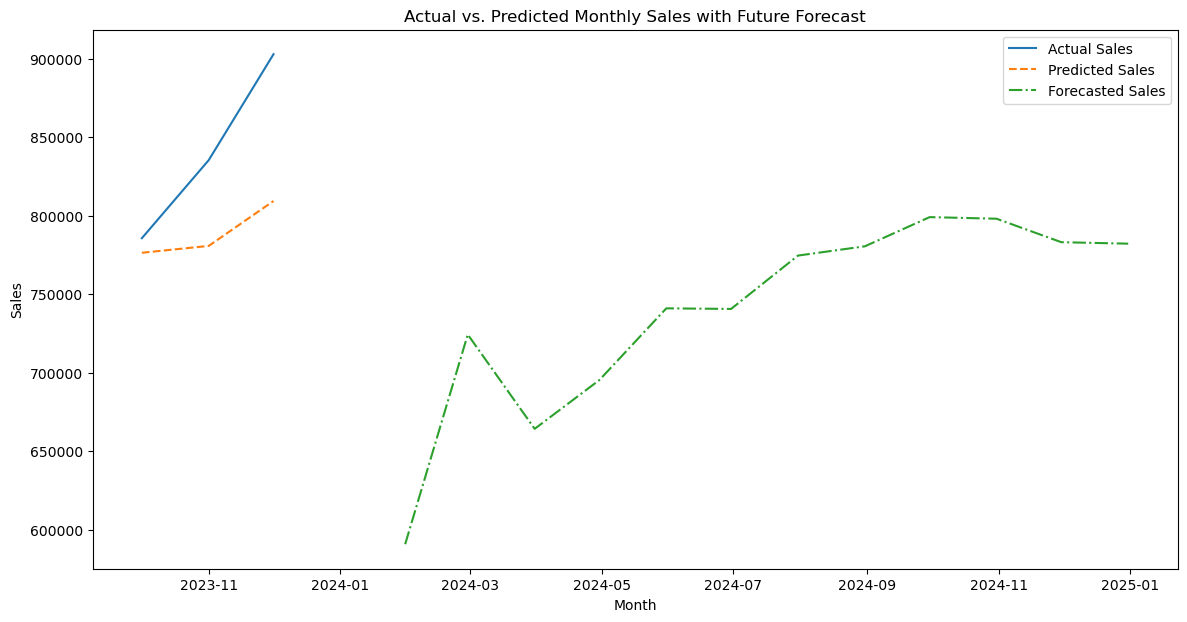

In [25]:

# Drop rows with NaN values due to lag features
monthly_data = monthly_data.dropna().reset_index(drop=True)

# Split the data into training and testing sets
X = monthly_data[['year', 'month_num', 'lag1', 'lag3', 'lag6', 'lag12']]
y = monthly_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the Random Forest Regressor with reduced number of trees and parallel processing
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Create a DataFrame for visualization
results = pd.DataFrame({
    'month': monthly_data.loc[X_test.index, 'month'],
    'actual_sales': y_test.values,
    'predicted_sales': y_pred
})

# Forecasting future sales
future_months = 12  # Number of future months to predict
last_date = monthly_data['month'].max()
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=future_months, freq='M')

# Initialize future data with the same structure as monthly_data
future_data = pd.DataFrame({
    'month': future_dates,
    'year': future_dates.year,
    'month_num': future_dates.month
})

# Fill the lag features iteratively
for i in range(future_months):
    if i == 0:
        future_data.loc[i, 'lag1'] = monthly_data['Sales'].iloc[-1]
        future_data.loc[i, 'lag3'] = monthly_data['Sales'].iloc[-3] if len(monthly_data) >= 3 else 0
        future_data.loc[i, 'lag6'] = monthly_data['Sales'].iloc[-6] if len(monthly_data) >= 6 else 0
        future_data.loc[i, 'lag12'] = monthly_data['Sales'].iloc[-12] if len(monthly_data) >= 12 else 0
    else:
        future_data.loc[i, 'lag1'] = future_data['Sales'].iloc[i-1]
        future_data.loc[i, 'lag3'] = future_data['Sales'].iloc[i-3] if i >= 3 else future_data['lag1'].iloc[i-1]
        future_data.loc[i, 'lag6'] = future_data['Sales'].iloc[i-6] if i >= 6 else future_data['lag1'].iloc[i-1]
        future_data.loc[i, 'lag12'] = future_data['Sales'].iloc[i-12] if i >= 12 else future_data['lag1'].iloc[i-1]
    
    # Predict the sales for the current future month
    current_X = future_data[['year', 'month_num', 'lag1', 'lag3', 'lag6', 'lag12']].iloc[i].values.reshape(1, -1)
    future_data.loc[i, 'Sales'] = model.predict(current_X)[0]

# Plot actual vs. predicted monthly sales with future forecast
plt.figure(figsize=(14, 7))
plt.plot(results['month'], results['actual_sales'], label='Actual Sales')
plt.plot(results['month'], results['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.plot(future_data['month'], future_data['Sales'], label='Forecasted Sales', linestyle='-.')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Monthly Sales with Future Forecast')
plt.legend()
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


Mean Absolute Error: 50722.470766667044
Root Mean Squared Error: 62766.262611079714
R^2 Score: -0.7083247417115945


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\base.py:464: U

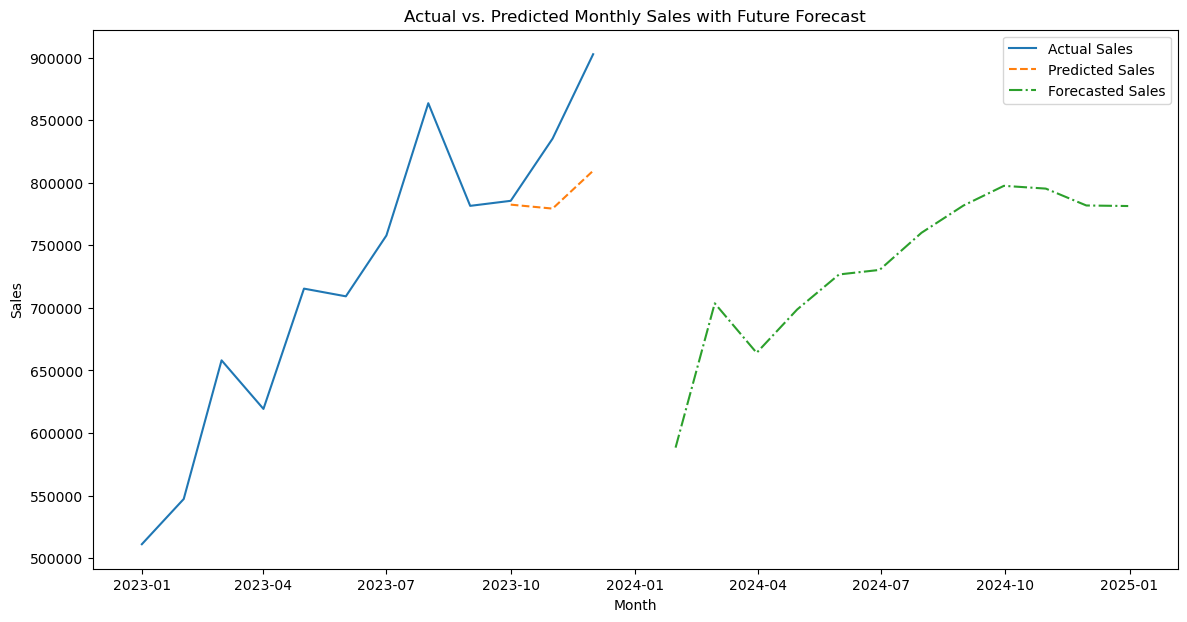

In [30]:
# Drop rows with NaN values due to lag features
monthly_data = monthly_data.dropna().reset_index(drop=True)

# Split the data into training and testing sets
X = monthly_data[['year', 'month_num', 'lag1', 'lag3', 'lag6', 'lag12']]
y = monthly_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Create a DataFrame for visualization
results = pd.DataFrame({
    'month': monthly_data.loc[X_test.index, 'month'],
    'actual_sales': y_test.values,
    'predicted_sales': y_pred
})

# Forecasting future sales
future_months = 12  # Number of future months to predict
last_date = monthly_data['month'].max()
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=future_months, freq='M')

# Initialize future data with the same structure as monthly_data
future_data = pd.DataFrame({
    'month': future_dates,
    'year': future_dates.year,
    'month_num': future_dates.month
})

# Fill the lag features iteratively
for i in range(future_months):
    if i == 0:
        future_data.loc[i, 'lag1'] = monthly_data['Sales'].iloc[-1]
        future_data.loc[i, 'lag3'] = monthly_data['Sales'].iloc[-3] if len(monthly_data) >= 3 else 0
        future_data.loc[i, 'lag6'] = monthly_data['Sales'].iloc[-6] if len(monthly_data) >= 6 else 0
        future_data.loc[i, 'lag12'] = monthly_data['Sales'].iloc[-12] if len(monthly_data) >= 12 else 0
    else:
        future_data.loc[i, 'lag1'] = future_data['Sales'].iloc[i-1]
        future_data.loc[i, 'lag3'] = future_data['Sales'].iloc[i-3] if i >= 3 else future_data['lag1'].iloc[i-1]
        future_data.loc[i, 'lag6'] = future_data['Sales'].iloc[i-6] if i >= 6 else future_data['lag1'].iloc[i-1]
        future_data.loc[i, 'lag12'] = future_data['Sales'].iloc[i-12] if i >= 12 else future_data['lag1'].iloc[i-1]
    
    # Predict the sales for the current future month
    current_X = future_data[['year', 'month_num', 'lag1', 'lag3', 'lag6', 'lag12']].iloc[i].values.reshape(1, -1)
    future_data.loc[i, 'Sales'] = best_model.predict(current_X)[0]

# Combine historical data with future data for plotting
combined_data = pd.concat([
    monthly_data[['month', 'Sales']].rename(columns={'Sales': 'actual_sales'}),
    future_data[['month', 'Sales']].rename(columns={'Sales': 'forecasted_sales'})
], ignore_index=True)

# Plot actual vs. predicted monthly sales with future forecast
plt.figure(figsize=(14, 7))
plt.plot(combined_data['month'], combined_data['actual_sales'], label='Actual Sales')
plt.plot(results['month'], results['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.plot(future_data['month'], future_data['Sales'], label='Forecasted Sales', linestyle='-.')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Monthly Sales with Future Forecast')
plt.legend()
plt.show()